<a href="https://colab.research.google.com/github/AKookani/Transormers_and_Finetuning_with_Supervised_Learning/blob/main/Workshop7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Language Models and Parameter-Efficient Fine-Tuning

## Language Models


Language models are fundamental to natural language processing. They come in three major categories:

1. **Encoder-only models**: (e.g., BERT, RoBERTa, ELECTRA) - Best suited for understanding tasks such as classification and regression.
2. **Encoder-decoder models**: (e.g., T5, BART) - Ideal for tasks like translation and summarization.
3. **Decoder-only models**: (e.g., GPT-n models) - Primarily used for text generation.


## Autoregressive Language Models


Autoregressive models predict the next token in a sequence based on previous tokens. This enables **conditional generation**, where outputs depend on the given prompt.


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
## Now let's use old - GPT2 for generating text
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel

# Initialize GPT-2 model and tokenizer
def initialize_gpt2():
    tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
    model = GPT2LMHeadModel.from_pretrained('gpt2')
    return tokenizer, model

gpt_tokenizer, gpt_model = initialize_gpt2()

# Function to generate text using GPT-2
def generate_text(prompt, max_length=50, temperature=1.0, top_k=50):
    """
    Generate text using GPT-2 with customizable parameters.

    Args:
        prompt (str): The initial text to seed the model.
        max_length (int): The maximum length of the generated text.
        temperature (float): Sampling temperature. Higher values make output more random.
        top_k (int): Limits sampling to the top-k most likely tokens.

    Returns:
        str: The generated text.
    """
    input_ids = gpt_tokenizer.encode(prompt, return_tensors="pt")

    # Generate text
    outputs = gpt_model.generate(
        input_ids,
        max_length=max_length,
        temperature=temperature,
        top_k=top_k,
        num_beams=5,
        no_repeat_ngram_size=2,
        early_stopping=True
    )
    return gpt_tokenizer.decode(outputs[0], skip_special_tokens=True)

prompts = [
    "Once upon a time in a distant land,",
    "The future of AI depends on",
    "In the middle of the storm, they found",
    "As the sun set over the horizon,",
]

for prompt in prompts:
    print(f"Input Prompt: {prompt}")
    print(f"Generated Text: {generate_text(prompt, max_length=100, temperature=0.7)}\n")

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Input Prompt: Once upon a time in a distant land,


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Text: Once upon a time in a distant land, there was a man who had been born in the land of the dead. He was the son of an old man, and his father had died when he was twelve years old. His father's body was found at the foot of a hill, but his mother had not been able to find it. The man's mother, who was in love with him, had taken him to her house, where she found him lying on the ground, covered with blood

Input Prompt: The future of AI depends on


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Text: The future of AI depends on it.

"I think it's going to be very interesting to see how it evolves over the next few years," he said. "I don't think there's any doubt that AI will be a big part of the future."

Input Prompt: In the middle of the storm, they found


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Text: In the middle of the storm, they found themselves in the midst of a large group of people who had gathered to celebrate the birth of their son.

"We were all in shock. We had never seen anything like this in our lives. It was so beautiful to see a child born in such a beautiful place," said one woman. "It was a very special moment for our family and for all of us who were here today. This is the first time we've ever seen a baby

Input Prompt: As the sun set over the horizon,
Generated Text: As the sun set over the horizon, a small group of people gathered in front of the building.

"What's going on here?" asked one of them. "I don't know what's happening here, but it looks like we're going to be attacked by a bunch of monsters. I'm not sure what to do about it, so I'll just leave it to you to figure it out." The others nodded in agreement, and the group began to walk towards the entrance to the



## Large Language Models (LLMs)


Large Language Models (LLMs) scale up the size and capacity of traditional language models. Key concepts include:

- **Scale**: Models like GPT-3 have billions of parameters, leading to significant improvements in performance.
- **Pre-training and Adaptation**: Pre-trained on massive datasets and later adapted to specific tasks.


## Ways to Adapt to New Tasks


Methods to adapt pre-trained models include:

1. **Zero-shot learning**: Use task descriptions as prompts without any training examples.
2. **Few-shot learning**: Provide a small number of task-specific examples.
3. **Lightweight Fine-tuning**: Modify only a subset of the model's parameters.
4. **Fine-tuning for human-aligned models**: Align models with human preferences using fine-tuning.


## Zero-shot Learning


 Fine-tuning T5 on a multi-task dataset for zero-shot learning.


In [2]:
!pip install datasets transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import torch

def zero_shot_question_answering(context, question, model_name="bigscience/T0_3B"):
    # Load the tokenizer and model from Hugging Face Hub
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSeq2SeqLM.from_pretrained(model_name)


    # Prepare the input with the context and question
    prompt = f"context: {context} question: {question}"

    # Tokenize the prompt , with padding and truncation,
    inputs = tokenizer(prompt, return_tensors="pt", padding=True, truncation=True)

    # Generate an answer from the model
    with torch.no_grad():
        outputs = model.generate(inputs["input_ids"], max_length=50, num_beams=5)

    # Decode the generated output to get the answer
    answer = tokenizer.decode(outputs[0], skip_special_tokens=True)

    return answer

# Define the context and the question
context = "Albert Einstein was a theoretical physicist who developed the theory of relativity. His work is also known for its influence on the philosophy of science."
question = "Who developed the theory of relativity?"

# Perform question answering
answer = zero_shot_question_answering(context, question)
print("Answer:", answer)


tokenizer_config.json:   0%|          | 0.00/1.86k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/632 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.79k [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


model.safetensors:   0%|          | 0.00/11.4G [00:00<?, ?B/s]

Answer: Albert Einstein


## Few-shot Learning


Few-shot learning strategies include:

1. **Prompt-based fine-tuning**: Modify the prompt to improve performance.
2. **In-context learning (ICL)**: Provide a few examples as part of the prompt for task demonstrations.


#### Prompt-based fine-tuning

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
from torch.optim import AdamW  # Use PyTorch's AdamW
from torch.utils.data import DataLoader, Dataset
from datasets import load_dataset

# Define a custom dataset for prompt-based fine-tuning
class PromptDataset(Dataset):
    def __init__(self, data, tokenizer, max_length=512):
        self.data = data
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        prompt, response = self.data[idx]
        encoded_input = self.tokenizer(
            prompt,
            truncation=True,
            padding="max_length",
            max_length=self.max_length,
            return_tensors="pt",
        )
        encoded_response = self.tokenizer(
            response,
            truncation=True,
            padding="max_length",
            max_length=self.max_length,
            return_tensors="pt",
        )
        return {
            "input_ids": encoded_input["input_ids"].squeeze(0),
            "attention_mask": encoded_input["attention_mask"].squeeze(0),
            "labels": encoded_response["input_ids"].squeeze(0),
        }

# Load pre-trained model and tokenizer of t5-small
tokenizer = AutoTokenizer.from_pretrained("t5-small")
model = AutoModelForSeq2SeqLM.from_pretrained("t5-small")

# Load SST-2 dataset
raw_dataset = load_dataset("glue", "sst2")

# Prepare data for fine-tuning
processed_data = []
for example in raw_dataset["train"]:
    sentence = example["sentence"]
    label = example["label"]  # 0 for negative, 1 for positive
    prompt = f"Sentiment analysis: {sentence} The sentiment is [MASK]."
    response = "positive" if label == 1 else "negative"  # Convert label to text
    processed_data.append((prompt, response))

# Create dataset and dataloader
dataset = PromptDataset(processed_data, tokenizer, max_length=64)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

# Define optimizer and device
optimizer = AdamW(model.parameters(), lr=5e-5)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Fine-tuning loop
num_epochs = 3
model.train()
for epoch in range(num_epochs):
    epoch_loss = 0
    for batch in dataloader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss / len(dataloader)}")

# Evaluate the fine-tuned model
def generate_response(prompt):
    model.eval()
    inputs = tokenizer(prompt, return_tensors="pt", truncation=True, padding="max_length", max_length=64).to(device)
    with torch.no_grad():
        outputs = model.generate(inputs.input_ids, max_length=64)
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

# Test the fine-tuned model
prompt = "Sentiment analysis: I love this product! The sentiment is [MASK]."
response = generate_response(prompt)
print(f"Prompt: {prompt}")
print(f"Response: {response}")


tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/35.3k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/3.11M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/72.8k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/148k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/67349 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/872 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1821 [00:00<?, ? examples/s]

Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Epoch 1/3, Loss: 0.07351157645781463
Epoch 2/3, Loss: 0.003858818256737545
Epoch 3/3, Loss: 0.0032287400661788787
Prompt: Sentiment analysis: I love this product! The sentiment is [MASK].
Response: positive


#### In-Context Learning(ICL)

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM

# Initialize a lighter model for efficient in-context learning
def initialize_model():
    model_name = "facebook/opt-125m"  # A lightweight OPT model
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForCausalLM.from_pretrained(model_name)
    return tokenizer, model

opt_tokenizer, opt_model = initialize_model()

def in_context_learning(prompt_examples, test_prompt, max_length=50, temperature=0.7):
    """
    Perform in-context learning by providing a few examples as part of the prompt.

    Args:
        prompt_examples (list of tuples): List of (input, output) examples.
        test_prompt (str): The input for which the output needs to be predicted.
        max_length (int): Maximum length of the generated text.
        temperature (float): Sampling temperature for controlling randomness.

    Returns:
        str: Generated output for the test_prompt.
    """
    # Build the in-context prompt
    context = "\n---\n".join([f"Input: {inp}\nOutput: {out}" for inp, out in prompt_examples])
    final_prompt = f"{context}\n---\nInput: {test_prompt}\nOutput:"

    # Tokenize and encode the prompt
    inputs = opt_tokenizer(final_prompt, return_tensors="pt", truncation=True, max_length=512)
    input_ids = inputs["input_ids"]
    attention_mask = inputs["attention_mask"]

    # Generate the output
    outputs = opt_model.generate(
        input_ids=input_ids,
        attention_mask=attention_mask,
        max_length=max_length,
        temperature=temperature,
        top_k=50,
        pad_token_id=opt_tokenizer.pad_token_id
    )

    # Decode and return the generated text
    generated_text = opt_tokenizer.decode(outputs[0], skip_special_tokens=True)

    # Post-process the output to extract only the response
    # Find the position of the test prompt in the generated text
    start_index = generated_text.find(test_prompt) + len(test_prompt) + len("\nOutput: ")
    end_index = generated_text.find("\n---", start_index)  # Find the next separator if it exists
    if end_index == -1:  # If no separator, take the rest
        end_index = None
    generated_output = generated_text[start_index:end_index].strip()
    return generated_output

# Few-shot examples
prompt_examples = [
    ("What is the capital of France?", "The capital of France is Paris."),
    ("What is the capital of Italy?", "The capital of Italy is Rome."),
    ("What is the capital of Japan?", "The capital of Japan is Tokyo."),
]

# Test input
test_prompt = "What is the capital of Germany?"

# Generate the answer
output = in_context_learning(prompt_examples, test_prompt, max_length=100, temperature=0.3)
print(f"Input: {test_prompt}")
print(f"Generated Output: {output}")

Input: What is the capital of Germany?
Generated Output: The capital of Germany is Berlin.


## Prompting Paradigm


Prompt engineering is critical for leveraging models like GPT-3. It involves:

- Task-specific prompts to guide the model.
- Advantages: Rapid prototyping, no parameter updates.
- Disadvantages: Sensitivity to prompt design and structure.


## Fine-tuning vs. In-context Learning


Comparison of techniques:

- **Fine-tuning**: Adjusts model weights, often leading to better performance but requires more resources.
- **In-context learning**: Provides task demonstrations as input without modifying the model.


## Parameter-Efficient Fine-Tuning (PEFT)


PEFT methods include:

1. **Adapters**: Add lightweight layers between transformer layers.
2. **Prompt Tuning & Prefix Tuning**: Optimize prompts or prefixes without modifying the model.
3. **LoRA (Low-Rank Adaptation)**: Fine-tune only low-rank updates to model parameters.


#### Adapters


In [3]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from transformers import BertTokenizer, BertModel
from datasets import load_dataset

# Define a custom dataset for classification
class TextClassificationDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        """
        Args:
            texts (list): List of input texts.
            labels (list): List of corresponding labels.
            tokenizer: Pre-trained tokenizer.
            max_length (int): Maximum sequence length.
        """
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoded = self.tokenizer(
            text,
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors="pt"
        )
        return {
            'input_ids': encoded['input_ids'].squeeze(0),
            'attention_mask': encoded['attention_mask'].squeeze(0),
            'label': torch.tensor(label, dtype=torch.long)
        }

# Define the Adapter class
class Adapter(nn.Module):
    def __init__(self, hidden_size, adapter_size):
        super(Adapter, self).__init__()
        self.down_proj = nn.Linear(hidden_size, adapter_size)
        self.relu = nn.ReLU()
        self.up_proj = nn.Linear(adapter_size, hidden_size)

    def forward(self, x):
        down = self.down_proj(x)
        activated = self.relu(down)
        up = self.up_proj(activated)
        return x + up  # Residual connection

# Define the model class using BERT with Adapters
class BERTWithAdapters(nn.Module):
    def __init__(self, num_classes, adapter_size=64):
        super(BERTWithAdapters, self).__init__()
        self.bert = BertModel.from_pretrained("bert-base-uncased")
        self.adapters = nn.ModuleList([
            Adapter(self.bert.config.hidden_size, adapter_size)
            for _ in range(self.bert.config.num_hidden_layers)
        ])
        self.dropout = nn.Dropout(0.1)
        self.classifier = nn.Linear(self.bert.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask, output_hidden_states=True)
        hidden_states = outputs.hidden_states

        # Apply adapters to each layer's hidden states
        adapted_hidden_states = []
        for i, adapter in enumerate(self.adapters):
            adapted_hidden_states.append(adapter(hidden_states[i + 1]))

        # Use the last adapter output for classification
        pooled_output = adapted_hidden_states[-1][:, 0]  # Use [CLS] token representation
        x = self.dropout(pooled_output)
        return self.classifier(x)

# Load tokenizer and model
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BERTWithAdapters(num_classes=2)  # Binary classification (Positive/Negative)

# Load GLUE SST-2 dataset
data = load_dataset("glue", "sst2")
train_texts = data["train"]["sentence"]
train_labels = data["train"]["label"]
val_texts = data["validation"]["sentence"]
val_labels = data["validation"]["label"]

# Create dataset and dataloaders
train_dataset = TextClassificationDataset(train_texts, train_labels, tokenizer, max_length=64)
val_dataset = TextClassificationDataset(val_texts, val_labels, tokenizer, max_length=64)
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=16)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=5e-5)
loss_fn = nn.CrossEntropyLoss()

# Training loop
num_epochs = 3
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for batch in train_dataloader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_dataloader)
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {avg_loss:.4f}")

# Evaluation loop
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for batch in val_dataloader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        predictions = torch.argmax(outputs, dim=1)
        correct += (predictions == labels).sum().item()
        total += labels.size(0)

accuracy = correct / total
print(f"Validation Accuracy: {accuracy:.4f}")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

README.md:   0%|          | 0.00/35.3k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/3.11M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/72.8k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/148k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/67349 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/872 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1821 [00:00<?, ? examples/s]

Epoch 1/3, Loss: 0.2099
Epoch 2/3, Loss: 0.1184
Epoch 3/3, Loss: 0.0848
Validation Accuracy: 0.8956


## Intrinsic Dimensionality


Research shows that LLMs operate in a low intrinsic dimension, meaning effective fine-tuning can occur in smaller parameter spaces.


## LoRA (Low-Rank Adaptation)


LoRA reduces the number of tunable parameters by:

1. Keeping original weights fixed.
2. Adding low-rank matrices to capture task-specific adaptations.

### Results and Takeaways
- Comparable performance to full fine-tuning with fewer parameters.
- Sometimes even outperforms full fine-tuning.


## Parameter-Efficient Fine-Tuning (PEFT) and Low-Rank Adaptation (LoRA)

# Introduction to PEFT and LoRA
## Parameter-Efficient Fine-Tuning (PEFT) and Low-Rank Adaptation (LoRA)

### Why PEFT?
Traditional fine-tuning of large language models requires updating all model parameters, which can be computationally expensive and memory-intensive. Parameter-Efficient Fine-Tuning (PEFT) techniques address this limitation by modifying only a small subset of parameters, reducing resource requirements significantly.

### What is LoRA?
LoRA (Low-Rank Adaptation) is a specific PEFT method that inserts low-rank matrices into the architecture of a pre-trained model, enabling efficient adaptation for downstream tasks. It is widely used for fine-tuning large language models like GPT and BERT without modifying their core parameters.

In this section, we will implement LoRA for fine-tuning a pre-trained BART model on a text summarization task.


In [4]:
# Install required libraries
!pip install transformers peft datasets rouge-score --quiet

  Preparing metadata (setup.py) ... done


In [5]:
# Import libraries
import torch
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, Seq2SeqTrainer, Seq2SeqTrainingArguments
from peft import get_peft_model, LoraConfig, TaskType
from datasets import load_dataset
# from datasets import load_metric
import matplotlib.pyplot as plt

In [6]:
# Load dataset
dataset = load_dataset("cnn_dailymail", "3.0.0", split={"train": "train[:5000]", "test": "test[:1000]"})

README.md:   0%|          | 0.00/15.6k [00:00<?, ?B/s]

train-00000-of-00003.parquet:   0%|          | 0.00/257M [00:00<?, ?B/s]

train-00001-of-00003.parquet:   0%|          | 0.00/257M [00:00<?, ?B/s]

train-00002-of-00003.parquet:   0%|          | 0.00/259M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/34.7M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/30.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/287113 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/13368 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11490 [00:00<?, ? examples/s]

In [7]:
# Load pre-trained model and tokenizer
model_name = "facebook/bart-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

config.json:   0%|          | 0.00/1.72k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/558M [00:00<?, ?B/s]

In [8]:
# Tokenize dataset
def preprocess_function(examples):
    inputs = examples["article"]  # Using 'article' from the CNN/DailyMail dataset
    model_inputs = tokenizer(inputs, max_length=1024, truncation=True, padding="max_length")

    with tokenizer.as_target_tokenizer():
        labels = tokenizer(examples["highlights"], max_length=128, truncation=True, padding="max_length")

    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

tokenized_datasets = dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

In [10]:
# LoRA Configuration
lora_config = LoraConfig(
    task_type=TaskType.SEQ_2_SEQ_LM,  # Specify task type
    r=8,  # Low-rank dimension
    lora_alpha=16,  # LoRA scaling factor
    target_modules=["q_proj", "v_proj"],  # Apply LoRA to query and value projections
    lora_dropout=0.1  # Dropout to avoid overfitting
)

In [11]:
# Apply LoRA to the model
peft_model = get_peft_model(model, lora_config)
print("LoRA model created with PEFT.")

LoRA model created with PEFT.


In [12]:
# Define training arguments
training_args = Seq2SeqTrainingArguments(
    output_dir="./lora_bart_cnn",  # Directory for model outputs
    evaluation_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    num_train_epochs=3,
    weight_decay=0.01,
    save_total_limit=2,
    predict_with_generate=True,
    logging_dir="./logs",
    logging_steps=100,
    save_strategy="epoch"
)

# Trainer setup
trainer = Seq2SeqTrainer(
    model=peft_model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["test"],
    tokenizer=tokenizer
)

In [13]:
# Train model
trainer.train()

# Save the fine-tuned LoRA model
peft_model.save_pretrained("./fine_tuned_lora_bart")
print("LoRA fine-tuned model saved.")

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss
1,4.523200,4.100483
2,4.248900,3.990906
3,4.243900,3.979395


LoRA fine-tuned model saved.


### ROUGE Metric
ROUGE (Recall-Oriented Understudy for Gisting Evaluation) is a popular metric for evaluating text summarization tasks. It measures the overlap between the generated summaries and reference summaries using metrics such as ROUGE-1, ROUGE-2, and ROUGE-L:

- **ROUGE-1**: Measures overlap of unigrams (single words).
- **ROUGE-2**: Measures overlap of bigrams (two consecutive words).
- **ROUGE-L**: Considers the longest common subsequence (LCS).

In this implementation, we use the `evaluate` library to compute ROUGE scores for the generated summaries compared to the ground truth.


In [14]:
# Install evaluate library
!pip install evaluate --quiet

# evaluation metric
import evaluate
rouge = evaluate.load("rouge")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.0 MB/s eta 0:00:00


In [15]:
# Generate predictions and evaluate
def evaluate_model(trainer, dataset, tokenizer):
    predictions, labels, _ = trainer.predict(dataset)  # Generate predictions on the dataset
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)  # Decode predictions
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)  # Decode labels

    # Compute ROUGE scores
    result = rouge.compute(predictions=decoded_preds, references=decoded_labels)
    return decoded_preds, decoded_labels, {key: value for key, value in result.items()}

preds, labels, results = evaluate_model(trainer, tokenized_datasets["test"], tokenizer)
print("ROUGE scores:", results)

ROUGE scores: {'rouge1': 0.23667815203787962, 'rouge2': 0.09500220995567907, 'rougeL': 0.19385365733601667, 'rougeLsum': 0.21555556396296432}


### Predictions vs Ground Truth

Below are some examples of the model's predictions compared to the ground truth summaries:



**Input Article 1:**
 (CNN)The Palestinian Authority officially became the 123rd member of the International Criminal Court on Wednesday, a step that gives the court jurisdiction over alleged crimes in Palestinian territories. The formal accession was marked with a ceremony at The Hague, in the Netherlands, where the court is based. The Palestinians signed the ICC's founding Rome Statute in January, when they also accepted its jurisdiction over alleged crimes committed "in the occupied Palestinian territory, includin ...

**Ground Truth Summary 1:**
 Membership gives the ICC jurisdiction over alleged crimes committed in Palestinian territories since last June .
Israel and the United States opposed the move, which could open the door to war crimes investigations against Israelis .

**Model Prediction 1:**
 The Palestinian Authority officially became the 123rd member of the International Criminal Court on Wednesday, a

**Input Article 2:**
 (CNN)Never mind cats having nine lives. A stra

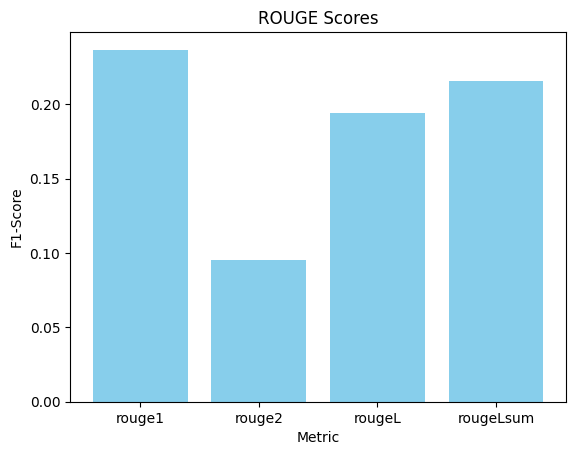

In [16]:
for i in range(3):  # Display 3 samples
    print(f"\n**Input Article {i+1}:**\n", tokenized_datasets["test"][i]["article"][:500], "...")  # Display first 500 characters of the article
    print(f"\n**Ground Truth Summary {i+1}:**\n", labels[i])  # Display the ground truth summary
    print(f"\n**Model Prediction {i+1}:**\n", preds[i])  # Display the model prediction

# Plot ROUGE scores
# Create a bar plot of the ROUGE scores
plt.bar(results.keys(), results.values(), color='skyblue')
plt.title("ROUGE Scores")
plt.ylabel("F1-Score")
plt.xlabel("Metric")
plt.show()

After fine-tuning with LoRA, we can compare the performance against traditional fine-tuning:

1. **Training Time**: LoRA reduces training time by only modifying specific parameters.
2. **Memory Usage**: The low-rank matrices minimize memory consumption.
3. **Performance Metrics**: Evaluate the ROUGE scores on the CNN/DailyMail test dataset.

The bar chart above visualizes the ROUGE metrics, and the displayed predictions provide qualitative insights into the model's performance.
